In [35]:
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,scale
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [2]:
df = pd.read_csv("lung_cancer_examples.csv")
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


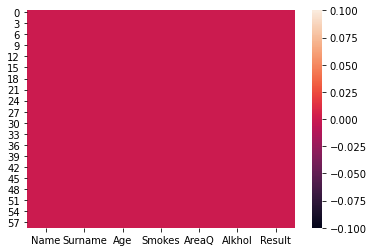

In [3]:
sns.heatmap(df.isna())

In [4]:
df["Result"].value_counts()

0    31
1    28
Name: Result, dtype: int64

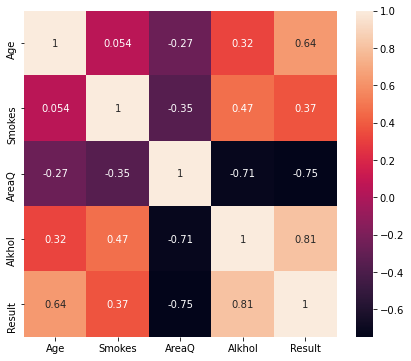

In [5]:
plt.figure(figsize=(7,6))
sns.heatmap(df.corr(),annot=True)

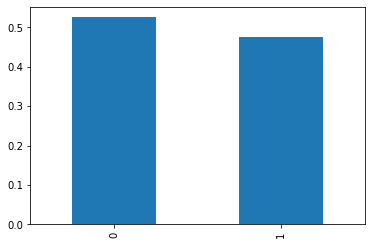

In [6]:
df.Result.value_counts(normalize=1).plot(kind='bar',alpha=1)

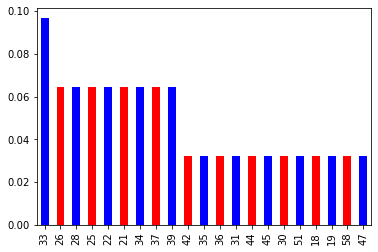

In [7]:
 df.Age[df.Result==0].value_counts(normalize=True).plot(kind='bar',alpha=1,color=['b','r'])

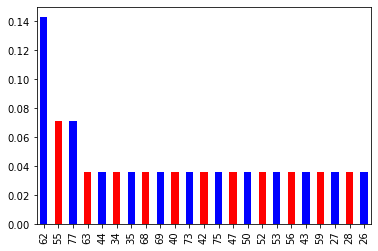

In [8]:
 df.Age[df.Result==1].value_counts(normalize=True).plot(kind='bar',alpha=1,color=['b','r'])

In [9]:
x = df.drop(["Name","Surname"],1)
std = StandardScaler()
x_= std.fit(x.values)
x = std.transform(x)
y = df["Result"].values

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=42)
def Print_result(clf,x_train,x_test,y_train,y_test,train=True):
    """
    print the classification report, confusion matrix and accuracy score
    """
    if train:
        """
        Training Result
        """
        print("Train Result...\n")
        print("Accuracy:\n{0:.4f}".format(accuracy_score(y_train,clf.predict(x_train))))
        print("classification report:\n{}".format(classification_report(y_train,clf.predict(x_train))))
        print("confusion matrix:\n{}".format(confusion_matrix(y_train,clf.predict(x_train))))
        
        cross = cross_val_score(clf,x_train,y_train,cv=15,scoring="accuracy")
        print("Average_score:\n{0:.4f}".format(cross.mean()))
        print("Accuracy_std:\n{0:.4f}".format(cross.std()))
        
    if train==False:
        """
        Testing Result
        """
        print("Test Result...\n")
        print("Accuracy:\n{0:.4f}".format(accuracy_score(y_test,clf.predict(x_test))))
        print("classification report:\n{}".format(classification_report(y_test,clf.predict(x_test))))
        print("confusion matrix:\n{}".format(confusion_matrix(y_test,clf.predict(x_test))))
        
        cross = cross_val_score(clf,x_test,y_test,cv=10,scoring="accuracy")
        print("Average_score:\n{0:.4f}".format(cross.mean()))
        print("Accuracy_std:\n{0:.4f}".format(cross.std()))

In [11]:
clf = SGDClassifier(random_state=3,loss='modified_huber',penalty='l2',alpha=0.001,
                    l1_ratio=0.15, fit_intercept=True,max_iter=200,
                    tol=0.001,epsilon=0.011,n_jobs=-1,
                    learning_rate='optimal',eta0=0.01,power_t=0.15,
                    early_stopping=False,validation_fraction=0.001,
                    n_iter_no_change=1,warm_start=True)
boost_clf = AdaBoostClassifier(base_estimator=clf,n_estimators=50,
                            learning_rate=1.0)

paras = {"n_estimators":[50,500,100],
        "learning_rate":[0.1,1.0,0.01]}

grid_ = GridSearchCV(boost_clf,paras,n_jobs=-1,verbose=1,cv=5)
skfold = StratifiedKFold(n_splits=5, random_state=None)
for train_index,test_index in skfold.split(x_train,y_train):
    clone_clf_s = make_pipeline(clone(grid_))
    x_train_fold = x_train[train_index]
    y_train_fold = y_train[train_index]
    x_test_fold = x_train[test_index]
    y_test_fold = y_train[test_index]  
    clone_clf_s.fit(x_train_fold,y_train_fold)
    y_pred = clone_clf_s.predict(x_test_fold)
    n_correct = sum(y_pred==y_test_fold)
    print("train_accuracy : {0:.4f}".format(n_correct/len(y_pred)))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


train_accuracy : 1.0000
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


train_accuracy : 1.0000
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


train_accuracy : 1.0000
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


train_accuracy : 1.0000
Fitting 5 folds for each of 9 candidates, totalling 45 fits
train_accuracy : 1.0000


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.4s finished


In [12]:
Print_result(clone_clf_s,x_train,x_test,y_train,y_test,train=True)

Train Result...

Accuracy:
1.0000
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

confusion matrix:
[[13  0]
 [ 0 16]]


c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 13 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Average_score:
1.0000
Accuracy_std:
0.0000


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.3s finished


In [13]:
knn = KNeighborsClassifier(n_neighbors=10,n_jobs=-1)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

In [14]:
Print_result(knn,x_train,x_test,y_train,y_test,train=True)

Train Result...

Accuracy:
1.0000
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

confusion matrix:
[[13  0]
 [ 0 16]]


c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 13 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)


Average_score:
1.0000
Accuracy_std:
0.0000


In [15]:
Print_result(knn,x_train,x_test,y_train,y_test,train=False)

Test Result...

Accuracy:
1.0000
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

confusion matrix:
[[18  0]
 [ 0 12]]
Average_score:
0.9667
Accuracy_std:
0.1000


In [16]:
log = LogisticRegression(penalty="l2")
log.fit(x_train,y_train)
Print_result(log,x_train,x_test,y_train,y_test,train=True)

Train Result...

Accuracy:
1.0000
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

confusion matrix:
[[13  0]
 [ 0 16]]


c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 13 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)


Average_score:
1.0000
Accuracy_std:
0.0000


In [17]:
Print_result(log,x_train,x_test,y_train,y_test,train=False)

Test Result...

Accuracy:
1.0000
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

confusion matrix:
[[18  0]
 [ 0 12]]
Average_score:
1.0000
Accuracy_std:
0.0000


In [18]:
de_clf = xgb.XGBClassifier(max_depth=3,learning_rate=0.0001,n_jobs=-1,
                           gamma=1,n_estimators=500)

skfold = StratifiedKFold(n_splits=10, random_state=None)

for train_index,test_index in skfold.split(x_train,y_train):
    clone_clf = make_pipeline(clone(de_clf))
    x_train_fold = x_train[train_index]  
    y_train_fold = y_train[train_index]
    x_test_fold = x_train[test_index]
    y_test_fold = y_train[test_index]
    
    clone_clf.fit(x_train_fold,y_train_fold)
    y_pred4 = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred4==y_test_fold)
    print("Accuracy_score : {0:.4f}".format(n_correct/len(y_pred4)))

Accuracy_score : 1.0000
Accuracy_score : 1.0000
Accuracy_score : 1.0000
Accuracy_score : 1.0000
Accuracy_score : 1.0000
Accuracy_score : 1.0000
Accuracy_score : 1.0000
Accuracy_score : 1.0000
Accuracy_score : 1.0000
Accuracy_score : 1.0000


In [19]:
Print_result(clone_clf,x_train,x_test,y_train,y_test,train=True)

Train Result...

Accuracy:
1.0000
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

confusion matrix:
[[13  0]
 [ 0 16]]


c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 13 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)


Average_score:
1.0000
Accuracy_std:
0.0000


In [20]:
knn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
Print_result(knn,x_train,x_test,y_train,y_test,train=True)
Print_result(knn,x_train,x_test,y_train,y_test,train=False)

Train Result...

Accuracy:
1.0000
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

confusion matrix:
[[13  0]
 [ 0 16]]


c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 13 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)


Average_score:
1.0000
Accuracy_std:
0.0000
Test Result...

Accuracy:
1.0000
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

confusion matrix:
[[18  0]
 [ 0 12]]
Average_score:
0.9667
Accuracy_std:
0.1000


In [40]:
def split_and_train(df,model,val_size):
    train_df = df.iloc[:-val_size]
    val_df = df.iloc[-val_size:]
    
    train_x = scale(train_df.drop(["Result","Name","Surname"],1).values)
    train_y = train_df["Result"].values
    
    val_x = scale(val_df.drop(["Result","Name","Surname"],1).values)
    val_y = val_df["Result"].values
    
    model.fit(train_x,train_y)
    test_pred = model.predict(val_x)
    score = accuracy_score(val_y,test_pred)
    
    print("accuracy score pf validation set ",score)
    
    cm = confusion_matrix(val_y,test_pred,labels=model.classes_)
    cmd = ConfusionMatrixDisplay(cm,display_labels=model.classes_)
    cmd.plot()
    plt.show()
    
    return model

accuracy score pf validation set  0.9666666666666667


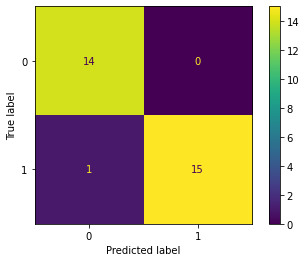

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
split_and_train(df,knn,30)

accuracy score pf validation set  0.9333333333333333


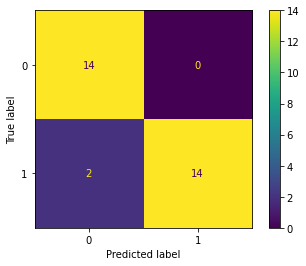

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.0001, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
split_and_train(df,de_clf,30)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   12.9s finished


accuracy score pf validation set  0.9666666666666667


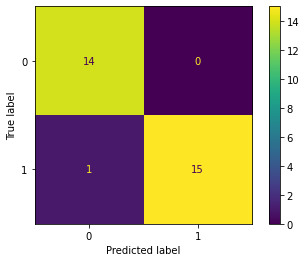

Pipeline(memory=None,
         steps=[('gridsearchcv',
                 GridSearchCV(cv=5, error_score=nan,
                              estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                           base_estimator=SGDClassifier(alpha=0.001,
                                                                                        average=False,
                                                                                        class_weight=None,
                                                                                        early_stopping=False,
                                                                                        epsilon=0.011,
                                                                                        eta0=0.01,
                                                                                        fit_intercept=True,
                                                                                 

In [43]:
split_and_train(df,clone_clf_s,30)